In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties

font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()
#plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.style.use('seaborn-whitegrid')

### データの生成

In [21]:
rng = np.random.RandomState(123)
d = 2
N = 10
mean = 5
x1 = rng.randn(N, d) + np.array([0,0])
x2 = rng.randn(N, d) + np.array([mean, mean])
x = np.concatenate((x1,x2), axis=0)

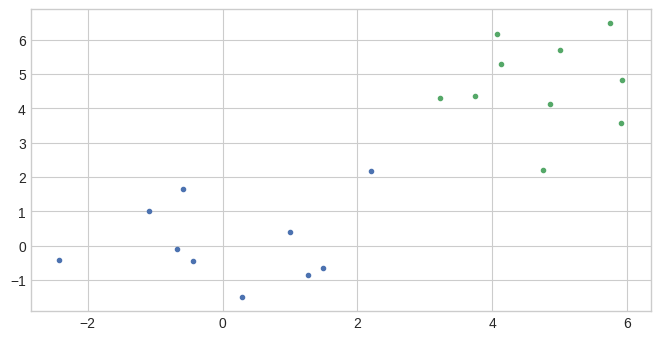

In [22]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(x1[:,0], x1[:,1], '.')
plt.plot(x2[:,0], x2[:,1], '.')

### Simple Perceptron

In [44]:
w = np.zeros(d)
b = 0

def y(x):
    return step(np.dot(w,x) + b)

def step(x):
    return 1 * (x > 0)

def t(i):
    if i<N:
        return 0
    else:
        return 1

In [45]:
ws = [w]
while True:
    classified = True
    for i in range(N*2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w == 0) * (delta_b == 0)
        ws.append(w)
    if classified:
        break

print('w: ', w)
print('b: ', b)

print('\nTest:')
print(y([0,0])) # => 0
print(y([5,5])) # => 1

w:  [ 2.14037745  1.2763927 ]
b:  -9

Test:
0
1


In [46]:
def r(x, w):
    return -1*w[0]/w[1]*x + 9/w[1] 

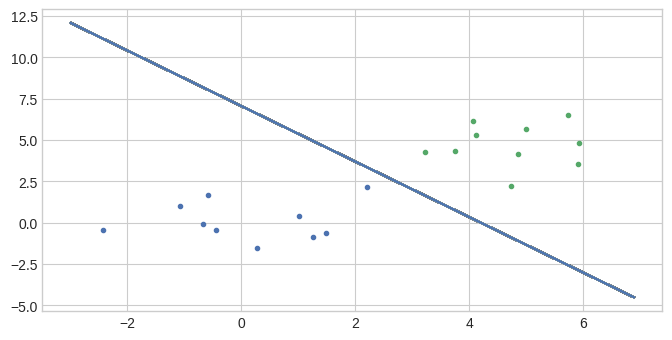

In [47]:
plt.figure(figsize=(8,4), dpi=100)
xx = np.arange(-3,7, 0.1)
plt.plot(x1[:,0], x1[:,1], '.')
plt.plot(x2[:,0], x2[:,1], '.')

for i in range(len(ws)):
    yy = r(xx, ws[i])
    plt.plot(xx, yy)